# Importing Libraries

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
import re
pd.set_option('mode.chained_assignment', None)
from spacy.lang.en.stop_words import STOP_WORDS
import string
from nltk.corpus import stopwords
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import f1_score,precision_score,recall_score,confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection
from wordcloud import WordCloud


#  Data Loading and Cleaning & Exploratory Data Analysis 


In [2]:
data = pd.read_excel('Data Analysis Test.xlsx')

In [3]:
data.head()

web-scraper-order                                       product-link  \
0     1657151960-63  Football Boots Men's Breathable Turf Trainers ...   
1   1657152792-2784  Football Boots Men High Top Spike Soccer Shoes...   
2   1657152652-2248           Men's Cleats Football Boots Soccer Shoes   
3    1657152117-618                Unisex Kaiser 5 Liga Football Boots   
4   1657152495-1863                        Men's AMA666 Football Boots   

                                        product-name product-price  \
0  Topwolve Football Boots Men's Breathable Turf ...        £29.99   
1  WOWEI Football Boots Men High Top Spike Soccer...        £32.99   
2  DREAM PAIRS Men's Cleats Football Boots Soccer...         £9.99   
3         adidas Unisex Kaiser 5 Liga Football Boots        £85.00   
4                   Gola Men's AMA666 Football Boots        £25.00   

         asin          rating-count    rating-avg review-page-link  \
0  B08C2P7JLS  1,209 global ratings  3.8 out of 5  See all reviews   
1  B08661HT54  1,371 global ratings    4 out of 5  See all reviews   
2  B076Z8ZBX2  1,897 global ratings  4.1 out of 5  See all reviews   
3  B01FN5ZUEW  2,866 global ratings  4.5 out of 5  See all reviews   
4  B00SWF7D14    812 global ratings  4.3 out of 5  See all reviews   

                                         review-date  \
0    Reviewed in the United Kingdom on 30 April 2022   
1           Reviewed in Germany on 21 September 2021   
2  Reviewed in the United States on 8 September 2020   
3                  Reviewed in Spain on 14 July 2020   
4  Reviewed in the United Kingdom on 28 January 2022   

                                         review-text   review-author  \
0  Was way to small and the quality was awful loa...       BMT Harry   
1                                               Rotz      Kevin Brey   
2                                Great for the price         aj61500   
3  Quería una zapatilla cómoda y clásica y las Vi...  Cliente Amazon   
4                                              Great      M. Stanley   

        review-rating  
0  1.0 out of 5 stars  
1  1.0 out of 5 stars  
2  4.0 out of 5 stars  
3  5.0 out of 5 stars  
4  5.0 out of 5 stars

In [12]:
data.drop(['web-scraper-order','asin'], axis=1, inplace=True)

In [13]:
data["product-price"] = data["product-price"].str.replace('£','',regex= False)
data["review-rating"] = data["review-rating"].str.replace('out of 5 stars','',regex= False)
data["rating-avg"] = data["rating-avg"].str.replace('out of 5','',regex= False)
data["rating-count"] = data["rating-count"].str.replace('global ratings','',regex= False)

In [14]:
data.head(5)

product-link  \
0  Football Boots Men's Breathable Turf Trainers ...   
1  Football Boots Men High Top Spike Soccer Shoes...   
2           Men's Cleats Football Boots Soccer Shoes   
3                Unisex Kaiser 5 Liga Football Boots   
4                        Men's AMA666 Football Boots   

                                        product-name product-price  \
0  Topwolve Football Boots Men's Breathable Turf ...         29.99   
1  WOWEI Football Boots Men High Top Spike Soccer...         32.99   
2  DREAM PAIRS Men's Cleats Football Boots Soccer...          9.99   
3         adidas Unisex Kaiser 5 Liga Football Boots         85.00   
4                   Gola Men's AMA666 Football Boots         25.00   

  rating-count rating-avg review-page-link  \
0       1,209        3.8   See all reviews   
1       1,371          4   See all reviews   
2       1,897        4.1   See all reviews   
3       2,866        4.5   See all reviews   
4         812        4.3   See all reviews   

                                         review-date  \
0    Reviewed in the United Kingdom on 30 April 2022   
1           Reviewed in Germany on 21 September 2021   
2  Reviewed in the United States on 8 September 2020   
3                  Reviewed in Spain on 14 July 2020   
4  Reviewed in the United Kingdom on 28 January 2022   

                                         review-text   review-author  \
0  Was way to small and the quality was awful loa...       BMT Harry   
1                                               Rotz      Kevin Brey   
2                                Great for the price         aj61500   
3  Quería una zapatilla cómoda y clásica y las Vi...  Cliente Amazon   
4                                              Great      M. Stanley   

  review-rating  
0          1.0   
1          1.0   
2          4.0   
3          5.0   
4          5.0

In [15]:
data.describe(include=object).T

count unique                                            top  \
product-link      2847     56            Unisex Kaiser 5 Liga Football Boots   
product-name      2847     56     adidas Unisex Kaiser 5 Liga Football Boots   
product-price     2845     41                                          85.00   
rating-count      2842     44                                         2,866    
rating-avg        2842     14                                           4.5    
review-page-link  2832      1                                See all reviews   
review-date       2832   2310  Reviewed in the United Kingdom on 6 July 2021   
review-text       2826   2650                                           Good   
review-author     2832   2290                                Amazon Customer   
review-rating     2832      5                                           5.0    

                  freq  
product-link       922  
product-name       922  
product-price      922  
rating-count       922  
rating-avg        1108  
review-page-link  2832  
review-date          5  
review-text          9  
review-author      138  
review-rating     1794

Checking for duplicates 

In [16]:
dup  = data.duplicated()
dups = sum(dup)
print("There are {} duplicates entries in the data..".format(dups))

There are 52 duplicates entries in the data..


In [17]:
data = data.drop_duplicates(['product-link','product-name','product-price','rating-count','rating-avg','review-rating','review-date','review-text','review-author'],keep=False)

In [18]:
dup  = data.duplicated(['product-link','product-name','product-price','rating-count','rating-avg','review-rating','review-date','review-text','review-author'])
dups = sum(dup)
print("There are {} duplicates entries in the data..".format(dups))

There are 0 duplicates entries in the data..


Checking for NaN values

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2743 entries, 0 to 2846
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   product-link      2743 non-null   object
 1   product-name      2743 non-null   object
 2   product-price     2741 non-null   object
 3   rating-count      2738 non-null   object
 4   rating-avg        2738 non-null   object
 5   review-page-link  2728 non-null   object
 6   review-date       2728 non-null   object
 7   review-text       2722 non-null   object
 8   review-author     2728 non-null   object
 9   review-rating     2728 non-null   object
dtypes: object(10)
memory usage: 235.7+ KB


In [20]:
data.isnull().sum()

product-link         0
product-name         0
product-price        2
rating-count         5
rating-avg           5
review-page-link    15
review-date         15
review-text         21
review-author       15
review-rating       15
dtype: int64

Handling NaN values 

In [21]:
value1 = data['product-price'].value_counts().mean()
value2 = data['rating-avg'].value_counts().mean()
value3 = data['review-page-link'].value_counts().mean()
value4 = data['rating-count'].value_counts().mean()
value5 = data['review-author'].value_counts().mean()
value6 = data['review-rating'].value_counts().mean()

In [22]:
data['product-price'].fillna(value1, inplace=True)
data['rating-count'].fillna(value4, inplace=True)
data['rating-avg'].fillna(value2, inplace=True)
data['review-page-link'].fillna(value3, inplace=True)
data['review-author'].fillna(value5, inplace=True)
data['review-rating'].fillna(value6, inplace=True)
df = data.dropna()


# Handling product-name to be readbly

In [23]:
print(df['product-name'].unique())

["Topwolve Football Boots Men's Breathable Turf Trainers Outdoor Cleats Professional Athletics Sneakers Teens Wear-Resistence Soccer Shoes Non-Slip Unisex"
 'WOWEI Football Boots Men High Top Spike Soccer Shoes Outdoor Training Football Shoes Sneakers 2.5 UK-10 UK'
 "DREAM PAIRS Men's Cleats Football Boots Soccer Shoes"
 'adidas Unisex Kaiser 5 Liga Football Boots'
 "Gola Men's AMA666 Football Boots"
 'BOTEMAN Mens Football Shoes Breathable Boys Girls Soccer Trainers Cleats Professional Football Boots Unisex'
 'adidas Men’s Messi 16.3 FG Footbal Shoes'
 "DREAM PAIRS Men's 160471-M Cleats Football Boots Soccer Shoes"
 "adidas Kaiser 5 Liga, Men's Football Boots"
 'DREAM PAIRS Boys Girls Football Boots Soccer Cleats Shoes Toddler/Little Kid/Big Kid HZ19003K'
 'PUMA Kids One 20.3 Mg Jr Football Boots'
 "PUMA Unisex's King Top Fg Football Boots"
 "PUMA Men's One 5.2 Fg/Ag Football Boots"
 "adidas Men's Copa 18.2 Fg Footbal Shoes"
 "Gola Unisex Kid's Ceptor Turf Qf Football Shoe"
 "LEOCI Pe

In [24]:
df['product-name'] = df['product-name'].replace(
    ['adidas Unisex Kaiser 5 Liga Football Boots','DREAM PAIRS Men\'s 160471-M Cleats Football Boots Soccer Shoes','DREAM PAIRS Men\'s Cleats Football Boots Soccer Shoes','Gola Men\'s AMA666 Football Boots','DREAM PAIRS Boys Girls Football Boots Soccer Cleats Shoes Toddler/Little Kid/Big Kid HZ19003K ','Topwolve Football Boots Men\'s Breathable Turf Trainers Outdoor Cleats Professional Athletics Sneakers Teens Wear-Resistence Soccer Shoes Non-Slip Unisex','WOWEI Football Boots Men High Top Spike Soccer Shoes Outdoor Training Football Shoes Sneakers 2.5 UK-10 UK','adidas Men’s Messi 16.3 FG Footbal Shoes','adidas Kaiser 5 Liga, Men\'s Football Boots ','BOTEMAN Mens Football Shoes Breathable Boys Girls Soccer Trainers Cleats Professional Football Boots Unisex','PUMA Unisex\'s King Top Fg Football Boots','adidas Men\'s Copa 18.2 Fg Footbal Shoes','PUMA Men\'s One 5.2 Fg/Ag Football Boots','adidas Unisex X 16.1 Fg J Football Boots','PUMA Kids Spirit III TT JR Football Shoe','PUMA ONE 20.4 HG Men\'s Football Boots Hard Ground','PUMA Future 5.4 HG Jr Football Boots Hard Ground Astro','PUMA Future 5.4','Football Shoes Kids Junior Mens Breathable Lace-Up Athletics Training Shoes Boys Outdoor Teenager Soccer Cleats Shoes（Little Kid/Big Kid)','PUMA Future 2.4 Hard Ground Men\'s Football','PUMA ONE 4 IL Synthetic Mens Football Boots Hard Ground','LEOCI Performance Soccer Shoes - Men and Kid\'s Boy and Girl Soccer Shoes Outdoor Soccer Cleat 763','PUMA Unisex\'s King Pro 21 Fg Soccer Shoe','PUMA One 3 Hard Ground Men\'s Leather Football Boots','PUMA Future 6.4 HG Jr Football Boots','Gola Unisex Kid\'s Ceptor Turf Qf Football Shoe','PUMA Men\'s Future Z 4.3 Tt Soccer Shoe','DIQUEQI Boys Girls Football Boots Cleats Soccer Shoes Professional Spikes Football Competition Shoes Training Sneakers For Unisex Kids','Nike Total 90 Shoot II Extra SG Jr Footballshoe','PUMA Kids One 20.3 Mg Jr Football Boots','VTASQ Boys Football Boots Kids FG/AG Soccer Athletics Training Shoes Cleats Shoes Teenager Outdoor Football Shoes Girls Breathable Sneakers Unisex','PUMA ONE 19.3 Men\'s Leather Football Boots','Boys Football Boots Kids Girls Shoes Soccer Athletics Trainers Sport Shoes Running Shoes Teenager Outdoor Football Shoes Sneakers for Unisex','PUMA Future 5.3 Netfit OSG Men\'s Football','PUMA Men\'s Future 5.2 Netfit Mxsg Football Boots','Mizuno Men\'s Monarcida Ii Sel Mix Football Shoe','Mens Football Boots Cleats Soccer Shoes  Spikes Football Competition Shoes Training Children\'s Football Shoes','Gola Mens Ama666 Rey Vx Black and White Astroturf Football Boots UK 7','PUMA ONE 19.3 CC Hard Ground Men\'s Leather Football Boots','PUMA ONE 20.3 Hard Ground Men\'s Leather Football Boots'],
    ['adidas Unisex','DREAM PAIRS 160471-M Cleats','DREAM PAIRS Cleats','Gola Men\'s','DREAM PAIRS Boys Girls Football','Topwolve Football Boots','WOWEI Football Boots Men','adidas Men’s Messi','adidas Kaiser 5 Liga','BOTEMAN Mens Football Shoes','PUMA Unisex\'s King','adidas Men\'s Copa','PUMA Men\'s One','adidas Unisex X','PUMA Kids Spirit III','PUMA ONE 20.4 HG','PUMA Future 5.4 HG','PUMA Future 5.4','Football Shoes Kids Junior Mens','PUMA Future 2.4 Hard','PUMA ONE 4 IL','LEOCI Performance Soccer Shoes','PUMA Unisex\'s King','PUMA One 3 Hard','PUMA Future 6.4 HG','Gola Unisex Kid\'s','PUMA Men\'s Future Z','DIQUEQI Boys Girls Football','Nike Total 90 Shoot','PUMA Kids One','VTASQ Boys Football Boots','PUMA ONE 19.3','Boys Football Boots Kids Girls','PUMA Future 5.3 Netfit','PUMA Men\'s Future 5.2 Netfit','Mizuno Men\'s Monarcida','Mens Football Boots Cleats Soccer','Gola Mens Ama666 Rey Vx','PUMA ONE 19.3 CC','PUMA ONE 20.3 Hard']
)

# Products Analyze based on number of count .

In [25]:
a = df['product-name'].value_counts()
fig = go.Figure([go.Bar(x=a.index, y=a.values,text=a.values)])
fig.update_layout(title='Distribution of the Rating using ploty',height = 1400)

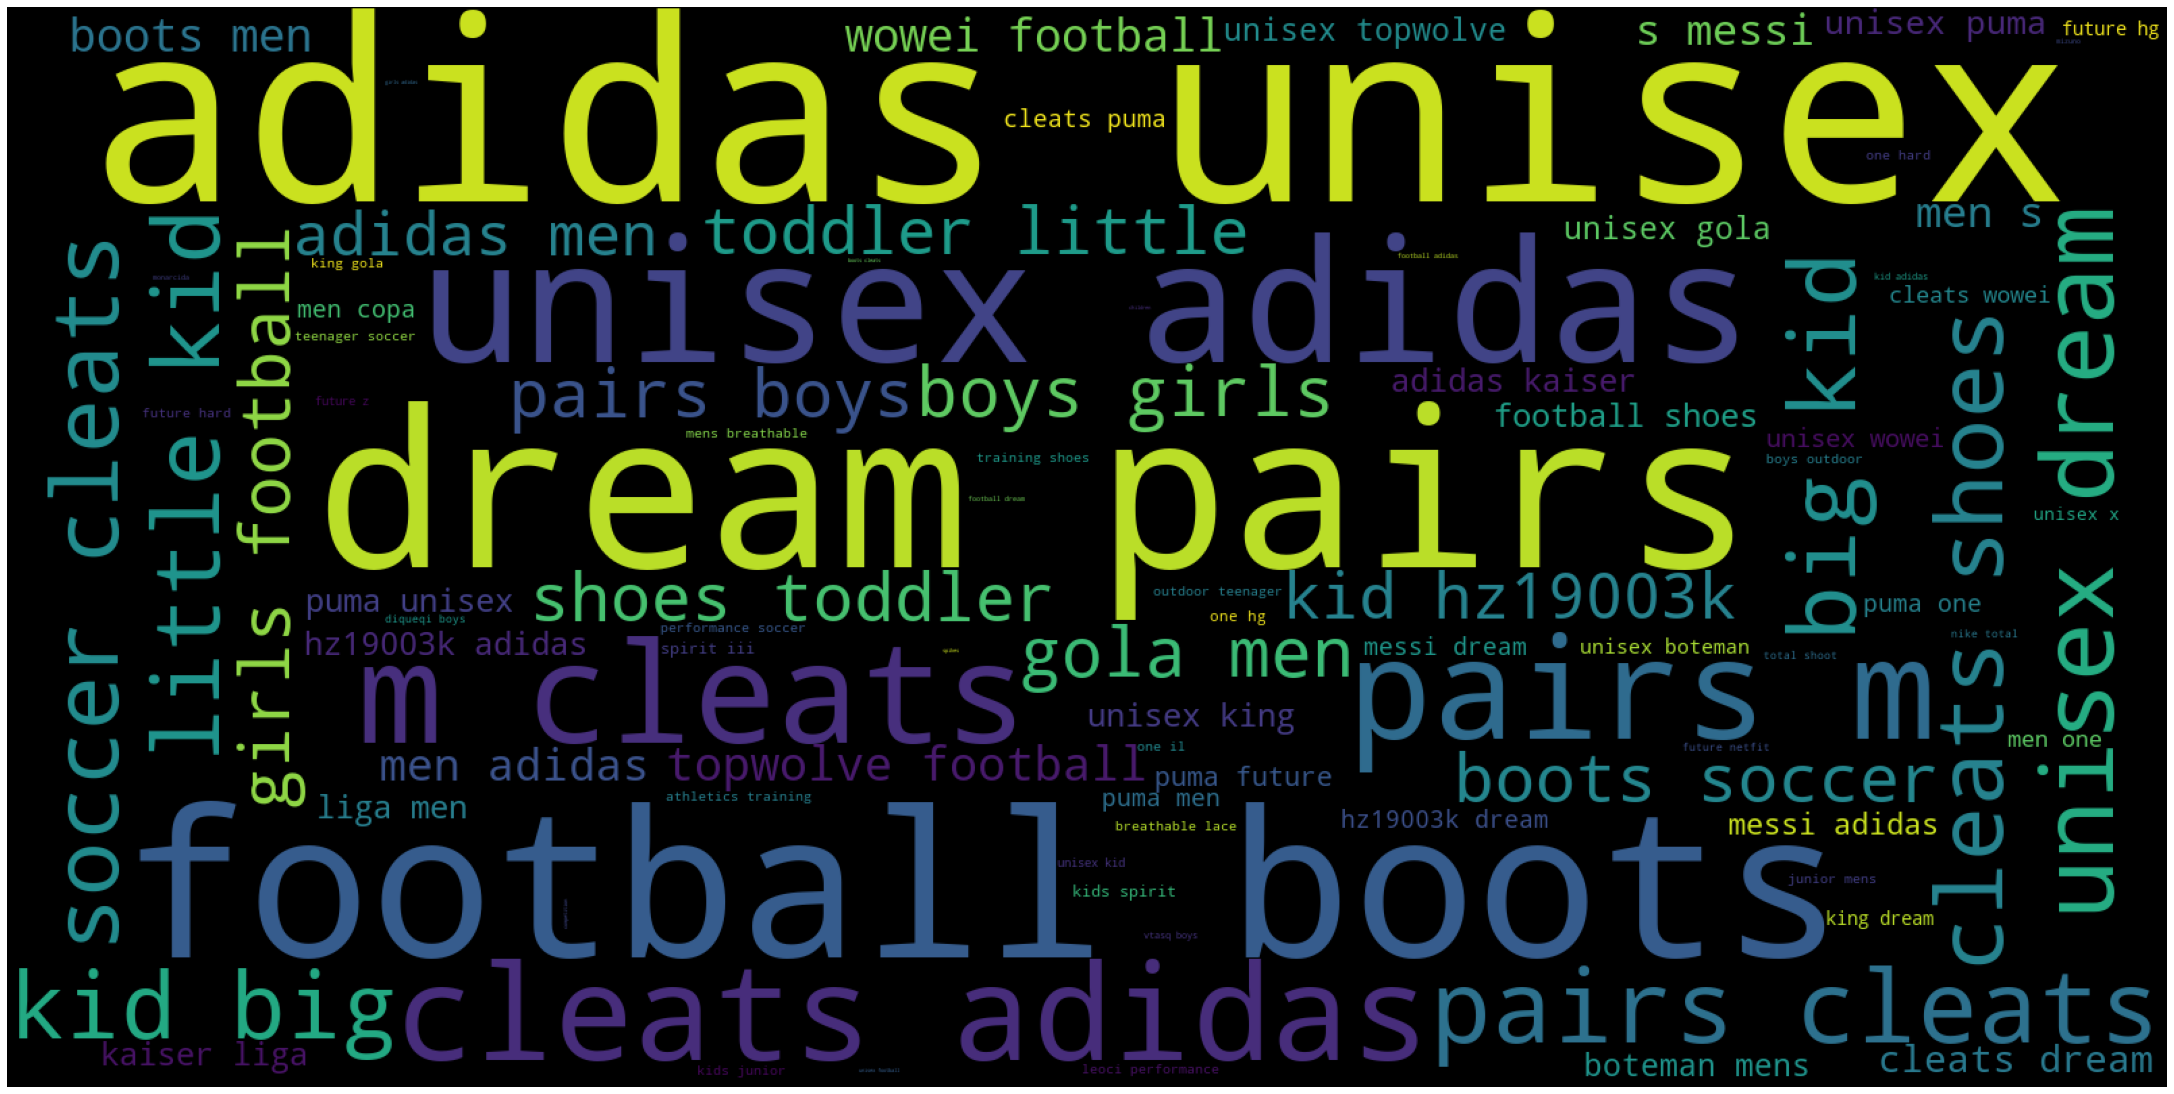

In [78]:
from wordcloud import WordCloud

wordcloud = WordCloud(    background_color='black',
                          width=1600,
                          height=800,
                    ).generate(' '.join(df['product-name'].str.lower().values))

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("Counts.png")
plt.show()

## The top three products have the maximun number of count is:
       
       First Product  : adidas Unisex Kaiser 5 Liga Football Boots with (918) count.
       
       Second product : WOWEI Football Boots Men High Top with (265) count.
       
       Third product  : DREAM PAIRS Cleats with (239) count.
       
## The top three products have the minimum number of count is:
                
       First Product  : PUMA ONE 20.3 Hard Ground Men's.
       
       Second product : PUMA ONE 19.3 CC Hard
       
       Third product  : Gola Mens Ama666 Rey Vx Black and White

# Analyze products based on rating count.

In [27]:
fig = px.histogram(df, 
             x = df['product-name'],
             color = df['rating-count'],
             height=1400,
             title='Distribution of the produts based on Rating-Count')
fig.show()

# The top three products have the maximun number of rating-count is:

   First Product   : adidas Unisex Kaiser 5 Liga Football Boots with (2866) rating-count.
   

   Second product  : DREAM PAIRS Boys Girls Football Boots Soccer Cleats Shoes Toddler/Little Kid/Big Kid HZ19003K 
                    with (2417) rating-count.
                    
                    
   Third product   : DREAM PAIRS Cleats with (1897) count.

# The top three products have the minimun number of rating-count is:

   First Product   : PUMA ONE 20.3 Hard Ground Men's(1) count.
   

   Second product  : PUMA ONE 19.3 CC Hard(12) count.
   

   Third product   : Gola Mens Ama666 Rey Vx Black and White(12) count.

# Analyze products based on the price.

To understand Which products change their price ?

In [28]:
fig = px.histogram(df, 
             x = df['product-name'],
             color = df['product-price'],
             height=1300,
             title='Distribution of the produts based on product-price')
fig.show()

## There is one product change their price:
    
   Product name  : BOTEMAN Mens Football Shoes Breathable Boys Girls Soccer Trainers Cleats Professional Football Boots                            Unisex 
   
   was selling (32) times at a price (of 29.7) & (32) times at a price (of 20.75)
                     

# Review Author Analyze

In [29]:
b = df['review-author'].value_counts()
fig = px.histogram(df,
             x =b.index,
             y =b.values,
             color =b.values,
             height=600,
             title='Distribution of the produts based on Rating-Count')
fig.show()

 The top auther with high count is Amazon Customer

# Review Rating Analyze

In [30]:
fig = px.histogram(df, 
             x = 'review-rating',
             color = 'review-rating',
             height=500,
             title='Distribution of Review Rating')
fig.show()

In [31]:
fig = px.pie(df, 
             names = 'review-rating',
             color = 'review-rating',
             height=500,
             title='Distribution of Review Rating')
fig.show()



# Products Analyze based on their review rating and rating average

To answer the follow questions:

What is the product that won the admiration of all customers?

What is the product that did not win the admiration of all customers?

Which products are different from people's opinion?

In [32]:
fig = px.scatter(df, 
             y= df['review-rating'],
             x = df['product-name'],
             color = df['review-rating'],
             height=1300,
             title='Scatter plot of the produts based on review-rating')
fig.show()


In [33]:
fig = px.scatter(df, 
             color= df['rating-avg'],
             y= df['rating-avg'],
             x = df['product-name'],
             height=1300,
             title='Scatter plot of the produts based on rating-avg')
fig.show()

In [34]:
fig = px.scatter(df, 
             y= df['rating-avg'],
             x = df['product-name'],
             color = df['review-rating'],
             height=1300,
             title='Scatter plot of the produts based on rating-avg')
fig.show()

In [35]:
fig = px.scatter(df, 
             color= df['rating-avg'],
             y= df['rating-count'],
             x = df['product-name'],
             height=1300,
             title='Scatter plot of the produts based on rating-avg with rating-count')
fig.show()

# From previos plots observied that:

The Best products that won the admiration of all customers are :

(PUMA ONE 20.3 Hard Ground Men's Leather Football Boots)

(PUMA Future 5.3 Netfit OSG Men's Football)

(PUMA ONE 19.3 CC Hard Ground Men's Leather Football Boots)

The product that did not win the admiration of all customers is :

(Topwolve Football Boots Men's Breathable Turf Trainers Outdoor Cleats Professional Athletics Sneakers Teens Wear-Resistence Soccer Shoes Non-Slip Unisex)

Products are different from people's opinion :

They have a very high or very low rating

(PUMA Kids One 20.3 Mg Jr Football Boots)

(Mens Football Boots Cleats Soccer Shoes  Spikes Football Competition Shoes Training Children's Football Shoes)


#  (PUMA ONE 19.3 CC Hard Ground Men's Leather Football Boots)
Is the most product that everyone likes

A rating of 5 stars has been given to almost (1758) products.

About 15.1% of the products are rated as 1 star.

The least number of products i.e 112 are given 2 star rating.

# Replace  rating :

{5,4   = 1} Good Review

{1,2,3 = 0} Bad Review


In [36]:
df['review-rating'] = df['review-rating'].astype(float).apply(lambda x: 1 if x>3 else 0)

In [37]:
df['review-rating'].value_counts()

1    2167
0     555
Name: review-rating, dtype: int64

In [38]:
good_reviews=df[df['review-rating']== 1]['review-text']
bad_reviews=df[df['review-rating']== 0]['review-text']
print("First 5 samples of good reviews\n".format(),good_reviews[:5])
print("First 5 samples of bad reviews\n".format(),bad_reviews[:5])

First 5 samples of good reviews
 2                                  Great for the price
3    Quería una zapatilla cómoda y clásica y las Vi...
4                                                Great
6              Definitely comfortable no squashed toes
8    Ma fille de 13 ans ne les quitte plus depuis q...
Name: review-text, dtype: object
First 5 samples of bad reviews
 0     Was way to small and the quality was awful loa...
1                                                  Rotz
7     I purchased these boots as I had heard great t...
16    It fell apart as soon as I started to wear the...
32    Los tacos se deshacen son muy malas\nMala cali...
Name: review-text, dtype: object


# WordCloud about GoodReview

In [50]:
positive_string = []
for t in good_reviews:
    positive_string.append(t)
pos_text = pd.Series(positive_string).str.cat(sep=' ')
pos_text[:100]

'Great for the price Quería una zapatilla cómoda y clásica y las Victoria reunen las condiciones que '

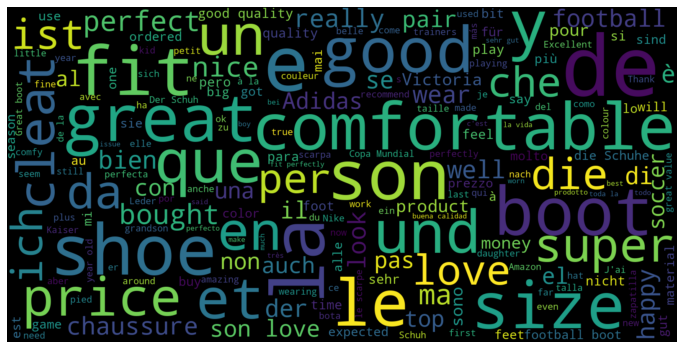

In [51]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(pos_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# WordCloud about BadReview

In [52]:
negative_string = []
for t in bad_reviews:
    negative_string.append(t)
neg_text = pd.Series(negative_string).str.cat(sep=' ')
neg_text[:100]

'Was way to small and the quality was awful loads of glue showing too. Rotz I purchased these boots a'

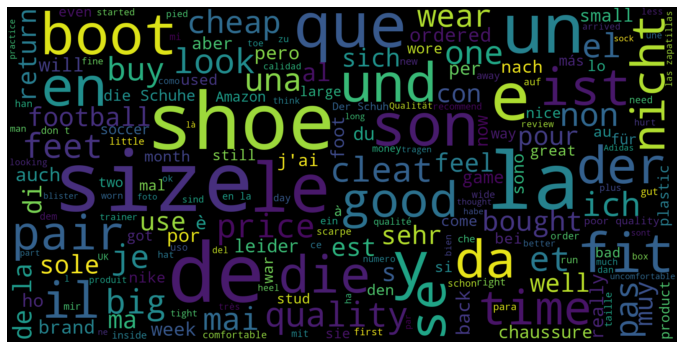

In [53]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(neg_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Text-preprocessing steps:

Convert all Characters to Lowe Case.

Remove Stopwords.

Remove Punctuation.

Stemmening.

Lemmatization

# Convert all Characters to Lowe Case

In [54]:
df['review-text'] = df['review-text'].str.lower() #convert to lower case

# Remove Punctuation

the string.punctuation in python contains the following punctuation symbols

!"#$%&\'()*+,-./:;<=>?@[\\]^_{|}~`

We can add or remove more punctuations as per our need.

In [55]:
PUNCT_TO_REMOVE = string.punctuation

def remove_punctuation(text): #function to remove the punctuation

    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["review-text"] = df["review-text"].apply(lambda text: remove_punctuation(text))

df['review-text'] = df['review-text'].apply(lambda x: re.sub('[^a-z A-Z 0-9]+', '', x))

# Remove Stopwords

In [56]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["review-text"] = df['review-text'].apply(lambda text: remove_stopwords(text))

# Stemmening using SnowballStemmer

In [57]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df['review-text'] = df['review-text'].apply(lambda text: stem_words(text))

# Lemmatization Using ( Verbs & Nouns & Adjectives)

In [58]:
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df['review-text'] = df['review-text'].apply(lambda text: lemmatize_words(text))

# Remove Emoji if exist


In [59]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

df['review-text'] = df['review-text'].apply(lambda string: remove_emoji(string))

# Machine Learning Model withText Feature Extraction

# Tfidf

In [60]:
data_tfidf = df['review-text']
labels = df['review-rating']

In [61]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,3))
final_tf_idf = tf_idf_vect.fit_transform(data_tfidf)
print("the type of count vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse._csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (2722, 68493)
the number of unique words including both unigrams and bigrams  68493


# Standardized Data Using MaxAbsScaler.

In [62]:
standardized_data_tfidf = MaxAbsScaler().fit_transform(final_tf_idf).todense()
print(standardized_data_tfidf.shape)

(2722, 68493)


# T-SNE To Improve Accueracy 

In [63]:
data_2000 = standardized_data_tfidf[0:2000,:]
labels_2000 = labels[0:2000]

model = TSNE(n_components=2, random_state=0)

tsne_data_tfidf = model.fit_transform(data_2000)


# creating a new data frame which help us in ploting the result data
tsne_data_tfidf = np.vstack((tsne_data_tfidf.T, labels_2000)).T
tsne_df_tfidf = pd.DataFrame(data=tsne_data_tfidf, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne

px.scatter(tsne_df_tfidf, x = 'Dim_1' , y = 'Dim_2' , color= "label")

# Split the data into (70:30) train : test

In [64]:
x_train, x_test, y_train, y_test = train_test_split(final_tf_idf, df['review-rating'], test_size=0.3, random_state=1)


# Function to plot Confusion Matrix

In [65]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

# Applying LogisticRegression Using GridSearch

In [70]:
params = {"C" : np.arange(0.1,1),"max_iter" : np.arange(10,100,10),"penalty" : ["l1","l2"]}
classifier = LogisticRegression()
model = model_selection.GridSearchCV(

    estimator= classifier,
    param_grid=params,
    cv = 10,
    verbose = 10,
    n_jobs=-1,
    scoring="accuracy"
)
model.fit(x_train,y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([0.1]),
                         'max_iter': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=10)

In [71]:
model.best_estimator_

LogisticRegression(C=0.1, max_iter=10)

Accuarcy in train : 0.8031496062992126
Accuarcy in test : 0.799265605875153
Precision in train : 0.801906779661017
Precision in test : 0.7990196078431373
Recall  in train: 0.9993399339933994
Recall  in test: 1.0
log loss 6.933280860151658
CVaccuracy in train: 79.63255% (0.12858%)
CVaccuracy in test: 79.80398% (0.06048%)


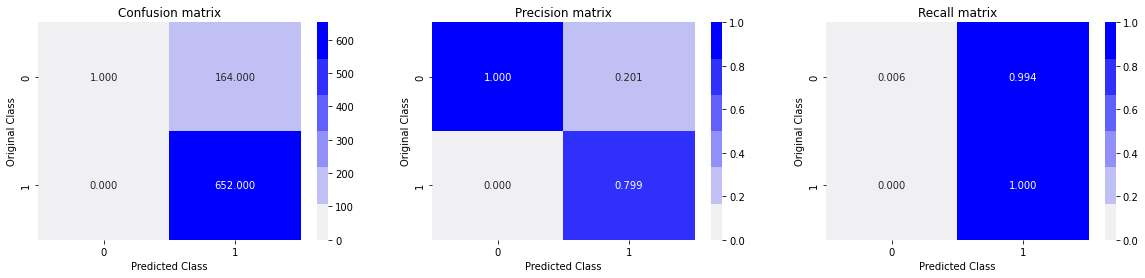

In [72]:
model = LogisticRegression(C=0.1,max_iter=10)
classifier.fit(x_train,y_train)
prediction = classifier.predict(x_test)

print('Accuarcy in train :' ,metrics.accuracy_score(y_train,classifier.predict(x_train)))
print('Accuarcy in test :' ,metrics.accuracy_score(y_test,prediction))

print('Precision in train :', precision_score(y_train, classifier.predict(x_train)))
print('Precision in test :', precision_score(y_test, prediction))

print('Recall  in train:', recall_score(y_train,classifier.predict(x_train)))
print('Recall  in test:', recall_score(y_test,prediction))

print('log loss' , metrics.log_loss(y_test, prediction))

accuracy_score(y_train,classifier.predict(x_train))

from sklearn.model_selection import cross_val_score
results = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5, scoring="accuracy")
print("CVaccuracy in train: %.5f%% (%.5f%%)" % (results.mean()*100.0, results.std()*100.0))

results = cross_val_score(estimator = classifier, X = x_test, y = y_test, cv = 5, scoring="accuracy")
print("CVaccuracy in test: %.5f%% (%.5f%%)" % (results.mean()*100.0, results.std()*100.0))

plot_confusion_matrix(y_test,prediction)

# Applying DesisionTree with GridSearch

In [73]:
classifier = DecisionTreeClassifier()

params = {
    "max_depth"    :np.arange(1,15,1),
    "criterion"    : ["gini","entropy"],
    "max_features" :np.arange(0.1,1)
    
}

model = model_selection.GridSearchCV(

    estimator= classifier,
    param_grid=params,
    cv = 10,
    verbose = 10,
    n_jobs=-1,
    scoring="accuracy"
)

model.fit(x_train,y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'max_features': array([0.1])},
             scoring='accuracy', verbose=10)

In [74]:
model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=13, max_features=0.1)

Accuarcy in train : 0.8624671916010499
Accuarcy in test : 0.7968176254589964
Precision in train : 0.8565737051792829
Precision in test : 0.8248663101604278
Recall  in train: 0.9933993399339934
Recall  in test: 0.946319018404908
Accuracy: 79.00579% (1.45722%)
CVaccuracy in test: 81.26468% (4.41856%)


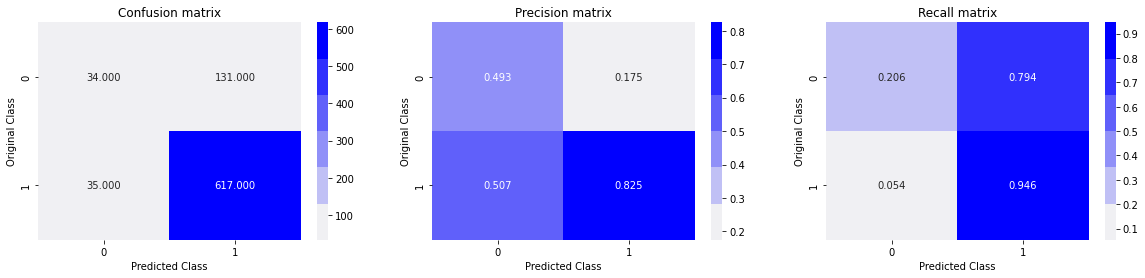

In [75]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=13, max_features=0.1)
model.fit(x_train,y_train)
prediction = model.predict(x_test)
print('Accuarcy in train :' ,metrics.accuracy_score(y_train,model.predict(x_train)))
print('Accuarcy in test :' ,metrics.accuracy_score(y_test,prediction))

print('Precision in train :', precision_score(y_train, model.predict(x_train)))
print('Precision in test :', precision_score(y_test, prediction))

print('Recall  in train:', recall_score(y_train,model.predict(x_train)))
print('Recall  in test:', recall_score(y_test,prediction))

results = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10,scoring="accuracy")
print("Accuracy: %.5f%% (%.5f%%)" % (results.mean()*100.0, results.std()*100.0))

results = cross_val_score(estimator = classifier, X = x_test, y = y_test, cv = 10,scoring="accuracy")
print("CVaccuracy in test: %.5f%% (%.5f%%)" % (results.mean()*100.0, results.std()*100.0))

plot_confusion_matrix(y_test,prediction)

# Applying ExtraDecisionTrees with GridSearch

In [76]:
classifier = ExtraTreesClassifier()

N_estimators = np.arange(1,100,10)
Max_depth = np.arange(2,10,2)
Criterion = ["gini","entropy"]
Max_features = np.arange(0.1,1)
params = dict(max_depth = Max_depth,n_estimators = N_estimators,criterion = Criterion,max_features = Max_features)
model = model_selection.GridSearchCV(

    estimator= classifier,
    param_grid=params,
    cv = 10,
    verbose = 10,
    n_jobs=-1,
    scoring="accuracy"
)
model.fit(x_train,y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


GridSearchCV(cv=10, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 4, 6, 8]),
                         'max_features': array([0.1]),
                         'n_estimators': array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])},
             scoring='accuracy', verbose=10)

In [ ]:
model = ExtraTreesClassifier(criterion='entropy', max_depth=12, n_estimators=400,max_features=0.1)
model.fit(x_train,y_train)
prediction = model.predict(x_test)

print('Accuracy in train: ',metrics.accuracy_score(y_train,model.predict(x_train),model))
print('Accuarcy in test : ',metrics.accuracy_score(y_test,prediction,model))

print('Precision in train :', precision_score(y_train, model.predict(x_train)))
print('Precision in test :', precision_score(y_test, prediction))

print('Recall  in train :', recall_score(y_train, model.predict(x_train)))
print('Recall  in test:', recall_score(y_test,prediction))

print('log loss' , metrics.log_loss(y_test, prediction))

plot_confusion_matrix(y_test,prediction)

results = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5,scoring="accuracy")
print("CVaccuracy in train: %.5f%% (%.5f%%)" % (results.mean()*100.0, results.std()*100.0))

results = cross_val_score(estimator = classifier, X = x_test, y = y_test, cv = 5,scoring="accuracy")
print("CVaccuracy in test: %.5f%% (%.5f%%)" % (results.mean()*100.0, results.std()*100.0))


# Copy Write By Mostafa TeHamer

# 